example for how to use double ended connect to connect the minima in an existing database

we will use as an example system the Lennard-Jones cluster with a small number of atoms.
Since we don't already have a database, for this example we'll build a small one using
basinhopping

In [1]:
pwd

u'/home/wk3user2/plc/free_energy/disconnectivity_graph'

In [21]:
# import cluster from xyz file
# construct water cluster database, 

from pele import storage 
from molecular_cluster import MolecularCluster, Molecule

class WaterCluster(MolecularCluster):
    def define_molecule(self):
        # define atom types, internal permutations, bonds
        types=["O","H","H"]
        permlist=[[1,2]]
        bonds=[[0,1],[0,2]]
        return Molecule(types,permlist,bonds)

nmol = 5
system = WaterCluster(nmol)
print system.get_masses()
print system.get_permlist()


will compute the lowest eigenvector by diagonalizing the Hessian
[15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794]
[[[0, 3, 6, 9, 12], [1, 4, 7, 10, 13], [2, 5, 8, 11, 14]], [1, 2], [4, 5], [7, 8], [10, 11], [13, 14]]


create the database where the minima and transition states will be stored

In [4]:
db = system.create_database()

In [5]:
# from pele.utils.xyz import read_xyz
# db = system.create_database()
# fin = open("TIP4P2.xyz", 'r')
# tip4p2 = read_xyz(fin)
# energy = float(tip4p2.title.split()[-2])
# tip4p2.coords

use basinhopping to build a database of minima

In [23]:
bh = system.get_basinhopping(database=db, outstream=None)
bh.run(300)

use the logging module to turn of status printing for the connect runs

In [8]:
import logging
logger = logging.getLogger("pele.connect")
logger.setLevel("WARNING")

do a bunch of double ended connect runs to find transition states connecting the minima

In [9]:
from pele.landscape import ConnectManager
manager = ConnectManager(db)
for i in xrange(20):
    min1, min2 = manager.get_connect_job()
    connect = system.get_double_ended_connect(min1, min2, db, verbosity=-1)
    connect.connect()

sending a random connect job 10 6
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -757.553053575 -> -757.554253925
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -728.413343067 -> -728.445812611
  positive before check. setting al

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 21 116
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute t

sending a random connect job 127 91
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before c

  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
energy decreased after uphill step -757.301373801 -> -757.354454144
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
stepping off the transition state resulted in twice the same minima 313
stepping off the transition state resulted in twic

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
stepping off the transition state resulted in twice the same minima 420
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing 

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -757.946592874 -> -757.95445801
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest

will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -754.074471942 -> -754.075353057
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
energy decreased after uphill step -757.944945954 -> -758.016812347
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 148 506
will compute the lowest eigenvec

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  pos

now that we have a database with minima and transition states we can build the disconnectivity graph

print some information about the database

In [24]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 819
number of transition states 558


In [18]:
db.minima()[-200:]

In [14]:
??DisconnectivityGraph

dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c6498d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c627ad0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c66f490>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c5810d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c6d8490>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859d1048d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c5fa710>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c3ad550>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c5f0810>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c67a4d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f

dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c59c3d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c581110>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c620ad0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c581650>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c455150>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c6b5b10>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c4dc690>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c6d8b90>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c8fe550>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f859c6492d0>
dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7f

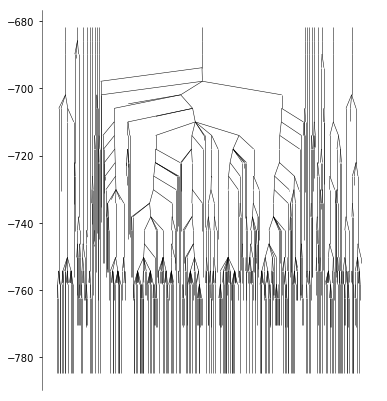

In [20]:
from pele.utils.disconnectivity_graph import DisconnectivityGraph, database2graph

graph = database2graph(db)
dgraph = DisconnectivityGraph(graph, minima=db.minima()[-400:])
dgraph.calculate()
dgraph.plot()
import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()

In [ ]:
dgraph2 = DisconnectivityGraph(graph, nlevels=3)
                              #order_by_energy = True)
dgraph2.calculate()
dgraph2.plot()
#import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()

In [ ]:
dgraph3 = DisconnectivityGraph(graph, order_by_energy = True)
dgraph3.calculate()
dgraph3.plot()
#import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()